In [1]:
import numpy as np
from scipy import fft
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from functools import partial

In [12]:
from MyPlots import plot_complex_exponential

## **Complex Numbers** 

Um número complexo pode ser representado nas seguintes formas 

- Retangular: $(a +jb)$ onde $a$ é a **parte real** e $b$ a **parte imaginária**.
- Polar: $A = \sqrt{a^2+b^2}$ e 
   - Se $a>0$ $\phi = tan^{-1}(\frac{b}{a})$
   - então $a<0$ $\phi = tan^{-1}(\frac{b}{a}) - \pi$


In [13]:
#Números complexos são nativos do python.
c1 = (5+12j)
c2 = (0 + 3j)
c3 = (3j)

print(c1, c2,c3)
print(f"\nMódulo ao quadrado: {c1*(np.conj(c1))}")

(5+12j) 3j 3j

Módulo ao quadrado: (169+0j)


In [14]:
#Como multiplicar uma variável por j.
n = np.arange(10)
print(1j*n)
print(1j+n)
print((1j+1)*n)

[0.+0.j 0.+1.j 0.+2.j 0.+3.j 0.+4.j 0.+5.j 0.+6.j 0.+7.j 0.+8.j 0.+9.j]
[0.+1.j 1.+1.j 2.+1.j 3.+1.j 4.+1.j 5.+1.j 6.+1.j 7.+1.j 8.+1.j 9.+1.j]
[0.+0.j 1.+1.j 2.+2.j 3.+3.j 4.+4.j 5.+5.j 6.+6.j 7.+7.j 8.+8.j 9.+9.j]


In [15]:
#numpy tem várias funções para trabalhar com exponenciais complexas.
print(f"Real: {np.real(c1)}, Imag:  {np.imag(c1)}")
print(f"Conjugado: {np.conj(c1)}")
print(f"Módulo: {np.abs(c1)}")
print(f"Ângulo: {np.angle(c1, deg=True)}") # Default é radianos.

Real: 5.0, Imag:  12.0
Conjugado: (5-12j)
Módulo: 13.0
Ângulo: 67.38013505195957


## **Euler's Formula** 

$e^{j\varphi} = cos(\varphi) + jsin(\varphi)$

$cos(\varphi) = \frac{e^{j\varphi} \text{ + } e^{-j\varphi}}{2}$

$sin(\varphi) = \frac{e^{j\varphi} \text{ - } e^{-j\varphi}}{2j}$

In [16]:
arg = (np.pi/3 + 45)
print(f"Exponencial complexa: {np.round(np.exp(1j*arg),4)}\n")
print(f"Real: {np.round(np.cos(arg),4)}, Imag: {np.round(1j*np.sin(arg),4)}")

Exponencial complexa: (-0.4742+0.8804j)

Real: -0.4742, Imag: 0.8804j


In [17]:
ecos = (np.exp(1j*arg) + np.exp(-1j*arg))/2
esin = (np.exp(1j*arg) - np.exp(-1j*arg))/2j
print(ecos, np.cos(arg))
print()
print(esin, np.sin(arg))

(-0.47424307400739596+0j) -0.47424307400739596

(0.8803939497497785+0j) 0.8803939497497785


# **Sinewaves** 

Basicamente, vimos que uma onda senoidal pode ser escrita como a combinação de 2 exponenciais complexas. Entretanto, ela também pode ser escrita da seguinte maneira.

$x[n] = Acos(\omega n T +\phi) = Acos(2 \pi f n T +\phi)$

- $A:$ Amplitude.
- $\omega:$ frequência angular ($\frac{radians}{seconds}$).
- $f = (\frac{\omega}{2\pi}):$ frequência em Hertz $(\frac{cycles}{seconds})$.
- $\phi:$ Fase inicial em radianos.
- $n:$ index de tempo.
- $T = (\frac{1}{f_s}):$ período de amostragem em segundos. $(t=nT=\frac{n}{f_s})$

Percebe-se que a senoide tem uma frequência $(f)$ e uma fase $(\phi)$. Vamos construir um exemplo:

In [18]:
f0  = 2     #Frequência da senoide Hz
phi = 0     #Fase da senoide

Suponha que a gente tem um sinal contínuo no tempo entre 0 e 1s. No computador isso seria representado por um vetor infinito. Entretanto, não podemos alocar um vetor infinito, logo, precisamos de amostras dentro desse intervalo para pelo menos visualizar a nossa senoide, processo conhecido como **amostragem**. A frequência com que pegamos amostras do sinal é conhecida como **frequência de amostragem**.

In [19]:
fs  = 100 # frequência de amostragem Hz
T   = 1/fs # período de amostragem

#Essa é uma das formas de se amostra
t   = np.arange(0, 1, T)

Se nossa frequência de amostragem é 100Hz espera-se que a cada segundo existam 100 amostras.

In [20]:
T,len(t)

(0.01, 100)

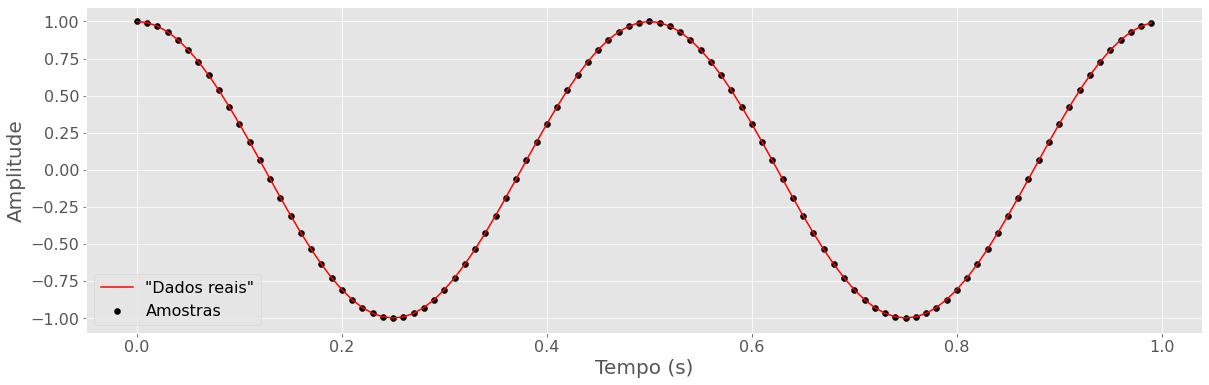

In [21]:
fig = plt.figure(figsize=(20,6))
x = np.cos(2*np.pi*f0*t+phi)

plt.scatter(t,x, label = "Amostras", c = 'k')
plt.plot(t,x, label = '"Dados reais"', c='r')
plt.ylabel("Amplitude",fontsize = 20)
plt.xlabel("Tempo (s)",fontsize = 20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

## **Complex Sinewave**

Podemos ter também ondas senoidais complexas:

- $\overline{x}[n] = Ae^{j(wnT +\phi)} =Ae^{j\phi}e^{jwnT} = Xe^{j(wnT)}$

- $\overline{x}[n] = Acos(wnT+\phi) + jAsin(wnT + \phi)$

Vamos dar um exemplo:

In [22]:
A   = 1
f   = 2
phi = 0

fs  = 100
T   = 1/fs

t   = np.arange(0, 1, T)

cexp = np.exp(1j*(2*np.pi*f*t+phi))

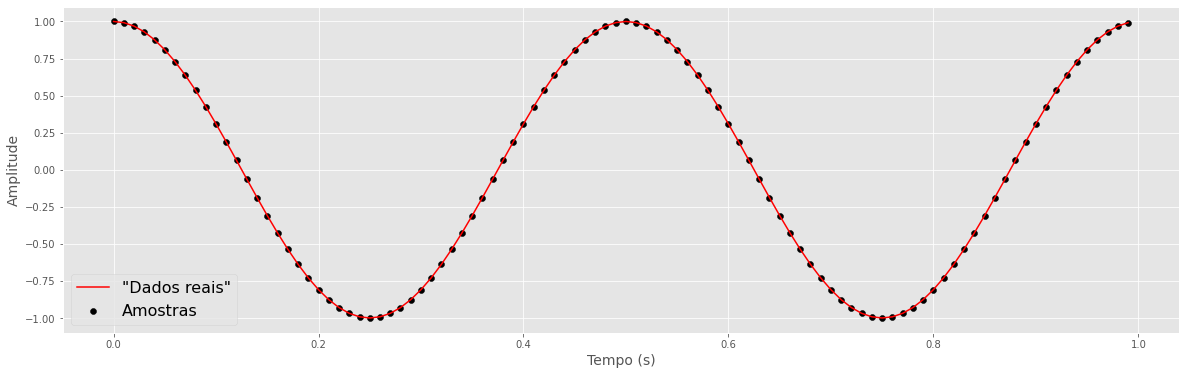

In [23]:
real_cexp = np.real(cexp)
imag_cexp = np.imag(cexp)

y = real_cexp

fig = plt.figure(figsize = (20,6))
plt.scatter(t,y, label = "Amostras", c = 'k')
plt.plot(t,y, label = '"Dados reais"', c='r')
plt.xlabel("Tempo (s)", fontsize = 14)
plt.ylabel("Amplitude",fontsize = 14)
plt.legend(fontsize=16)    
plt.show()

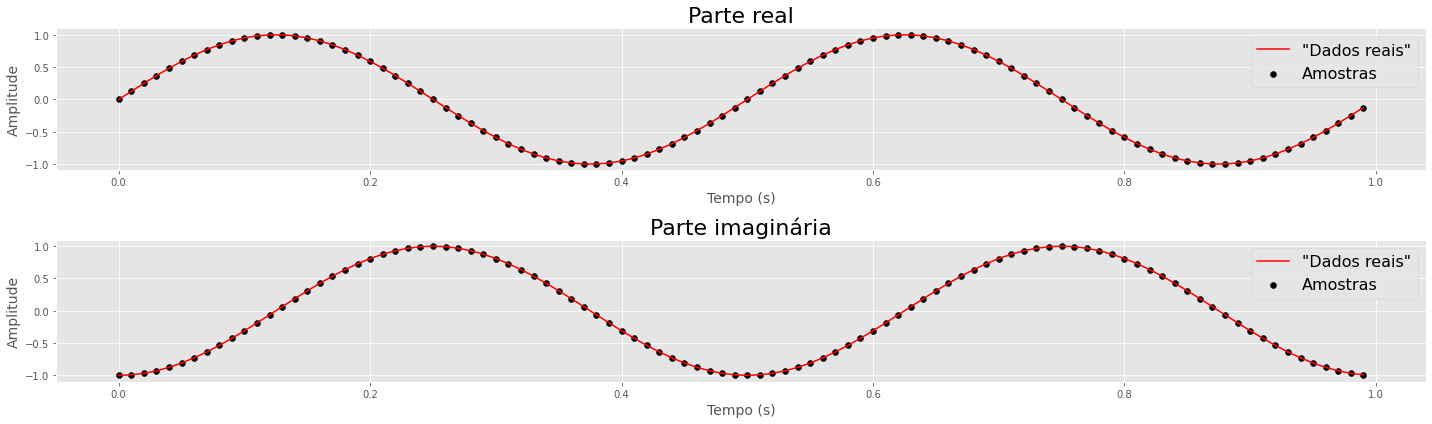

In [24]:
plot_complex_exponential(A, f, -np.pi/2, fs)

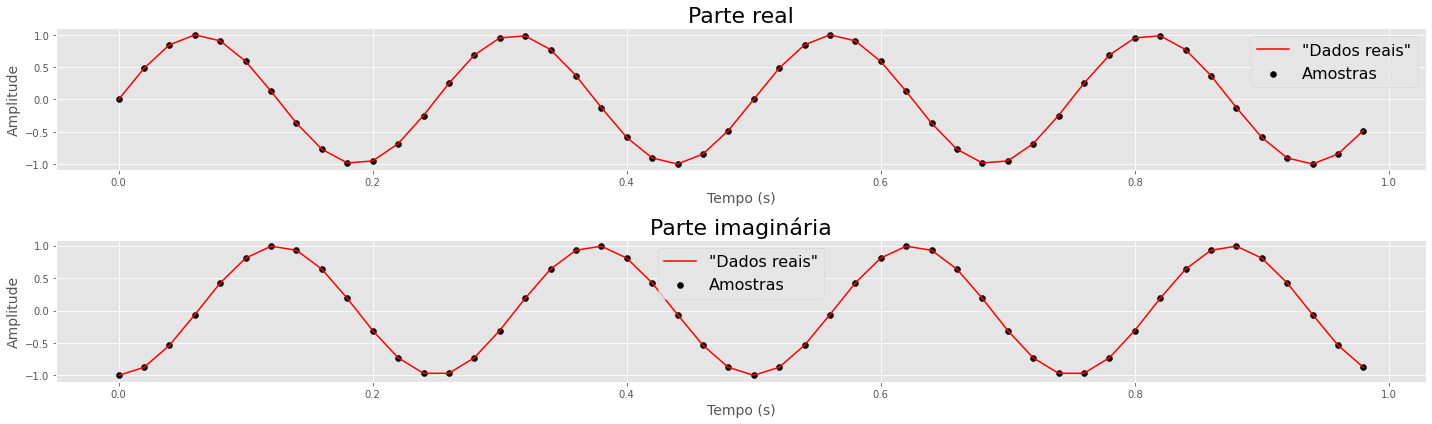

In [25]:
plot_complex_exponential(A, 2*f, -np.pi/2, fs/2)

## **Real Sinewaves**

Lembrando que, normalmente, queremos utilizar ondas senoidais complexas para calcular ondas senoidais reais, conforme o seguinte exemplo:

$x[n] = Acos(\omega n T + \phi) = \frac{A}{2}(e^{j(\omega nT + \phi)}+ e^{-j(\omega nT + \phi)}) = \frac{1}{2}\overline{x}[n] + \frac{1}{2}\overline{x}^*[n] = \Re\{\overline{x}[n]\}$